# Боксплот Тьюки

Необходимо сгенерировать выборки размером 20 и 100 элементов. Построить для них боксплот Тьюки. Для каждого распределения определить долю выбросов экспериментально (сгенерировав выборку, соответсвующую распределению 1000 раз, и вычислив среднюю долю выбросов) и сравнить с результатами, полученными теоретически. 

Подключаем все необходимые библиотеки

In [23]:
from scipy.stats import norm, laplace, poisson, cauchy, uniform
import numpy as np
import math as m
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
sizes = [20, 100]
NORMAL, CAUCHY, LAPLACE, POISSON, UNIFORM = "NormalNumber", "CauchyNumber", "LaplaceNumber", "PoissonNumber", "UniformNumber"
NUMBER_OF_REPETITIONS = 1000
STR_1, STR_2 = 'Доля выбросов выборки из 20 элементов: ', 'Доля выбросов выборки из 100 элементов: '
EXPANSION = '.jpg'

Функция, вычисляющая длину усов

In [25]:
def moustache(distribution):
    q_1, q_3 = np.quantile(distribution, [0.25, 0.75])
    return q_1 - 3 / 2 * (q_3 - q_1), q_3 + 3 / 2 * (q_3 - q_1)

Функция, выдающая количество найденных выбросов

In [26]:
def count_out(distribution):
    x1, x2 = moustache(distribution)
    filtered = [x for x in distribution if x > x2 or x < x1]
    return len(filtered)

Функция, отрисовывающая графики Боксплот Тьюки

In [27]:
def DrawBoxplot(tips, name):
    sns.set_theme(style="whitegrid")    
    sns.boxplot(data=tips, palette='rainbow', orient='h');
    sns.despine(offset=10)
    plt.xlabel("x")
    plt.ylabel("n")
    plt.title(name)
    plt.savefig(str(name)+EXPANSION)    
    return

Функция вывода ответа на экран

In [28]:
def printAnswer(result):
    print('& ' + str(result[0]) + '& ' +  str(result[1]))
    print(STR_1 + str(result[0]))
    print(STR_2 + str(result[1]))

Функция построения Боксплот Тьюки и высчитывания доли выбросов для нормального распределения

& 0.0244& 0.01402
Доля выбросов выборки из 20 элементов: 0.0244
Доля выбросов выборки из 100 элементов: 0.01402


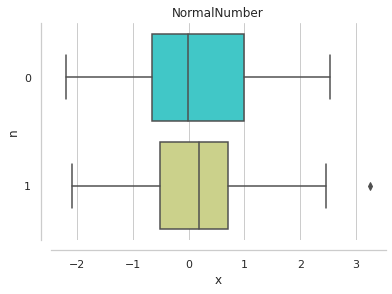

In [29]:
def NormalBoxplotTukey():
    tips, result, count = [], [], 0
    for size in sizes:
        for i in range(NUMBER_OF_REPETITIONS):
            distribution = norm.rvs(size=size)
            distribution.sort()
            count += count_out(distribution)
        result.append(count/(size * NUMBER_OF_REPETITIONS))
        distribution = norm.rvs(size=size)
        distribution.sort()
        tips.append(distribution)
    DrawBoxplot(tips, NORMAL)  
    printAnswer(result)
    return

NormalBoxplotTukey()

Функция построения Боксплот Тьюки и высчитывания доли выбросов для распределения Коши

& 0.1515& 0.18539
Доля выбросов выборки из 20 элементов: 0.1515
Доля выбросов выборки из 100 элементов: 0.18539


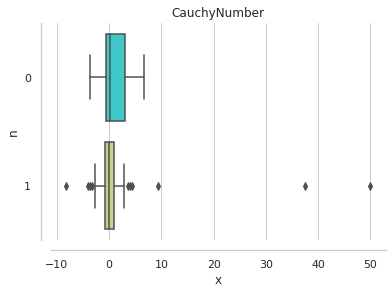

In [30]:
def CauchyBoxplotTukey():
    tips, result, count = [], [], 0
    for size in sizes:
        for i in range(NUMBER_OF_REPETITIONS):
            distribution = cauchy.rvs(size=size)
            distribution.sort()
            count += count_out(distribution)
        result.append(count/(size * NUMBER_OF_REPETITIONS))
        distribution = cauchy.rvs(size=size)
        distribution.sort()
        tips.append(distribution)
    DrawBoxplot(tips, CAUCHY)  
    printAnswer(result)
    return

CauchyBoxplotTukey()

Функция построения Боксплот Тьюки и высчитывания доли выбросов для распределения Лапласа

& 0.07595& 0.08167
Доля выбросов выборки из 20 элементов: 0.07595
Доля выбросов выборки из 100 элементов: 0.08167


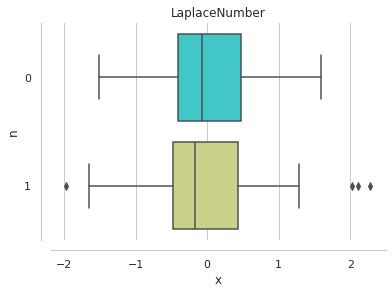

In [31]:
def LaplaceBoxplotTukey():
    tips, result, count = [], [], 0
    for size in sizes:
        for i in range(NUMBER_OF_REPETITIONS):
            distribution = laplace.rvs(size=size, scale=1 / m.sqrt(2), loc=0)
            distribution.sort()
            count += count_out(distribution)
        result.append(count/(size * NUMBER_OF_REPETITIONS))
        distribution = laplace.rvs(size=size, scale=1 / m.sqrt(2), loc=0)
        distribution.sort()
        tips.append(distribution)
    DrawBoxplot(tips, LAPLACE)  
    printAnswer(result)
    return

LaplaceBoxplotTukey()

Функция построения Боксплот Тьюки и высчитывания доли выбросов для распределения Пуассона

& 0.0244& 0.01649
Доля выбросов выборки из 20 элементов: 0.0244
Доля выбросов выборки из 100 элементов: 0.01649


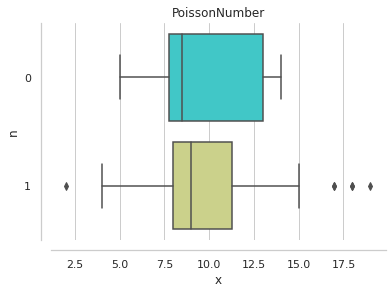

In [32]:
def PoissonBoxplotTukey():
    tips, result, count = [], [], 0
    for size in sizes:
        for i in range(NUMBER_OF_REPETITIONS):
            distribution = poisson.rvs(10, size=size)
            distribution.sort()
            count += count_out(distribution)
        result.append(count/(size * NUMBER_OF_REPETITIONS))
        distribution = poisson.rvs(10, size=size)
        distribution.sort()
        tips.append(distribution)
    DrawBoxplot(tips, POISSON)  
    printAnswer(result)
    return

PoissonBoxplotTukey()

Функция построения Боксплот Тьюки и высчитывания доли выбросов для равномерного распределения

& 0.0024& 0.00048
Доля выбросов выборки из 20 элементов: 0.0024
Доля выбросов выборки из 100 элементов: 0.00048


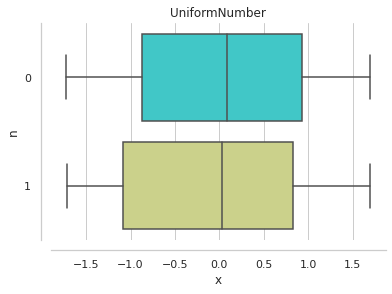

In [33]:
def UniformBoxplotTukey():
    tips, result, count = [], [], 0
    for size in sizes:
        for i in range(NUMBER_OF_REPETITIONS):
            distribution = uniform.rvs(size=size, loc=-m.sqrt(3), scale=2 * m.sqrt(3))
            distribution.sort()
            count += count_out(distribution)
        result.append(count/(size * NUMBER_OF_REPETITIONS))
        distribution = uniform.rvs(size=size, loc=-m.sqrt(3), scale=2 * m.sqrt(3))
        distribution.sort()
        tips.append(distribution)
    DrawBoxplot(tips, UNIFORM)  
    printAnswer(result)
    return

UniformBoxplotTukey()